In [144]:
import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hadoop-train-test/Hadoop_test_sliding_window.csv
/kaggle/input/hadoop-train-test/Hadoop_train_sliding_window.csv


In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [146]:
train = pd.read_csv('/kaggle/input/hadoop-train-test/Hadoop_train_sliding_window.csv')
test = pd.read_csv('/kaggle/input/hadoop-train-test/Hadoop_test_sliding_window.csv')

print("Train Shape:",train.shape,"Test Shape:",test.shape)

Train Shape: (143835, 566) Test Shape: (35884, 322)


<Axes: xlabel='label', ylabel='count'>

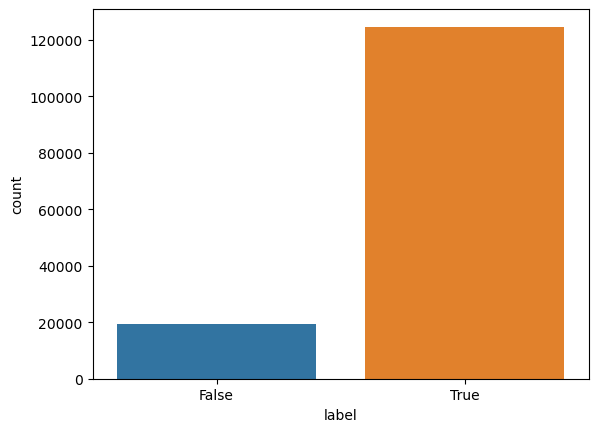

In [147]:
train['label'].value_counts()
sns.countplot(x=train['label'])

<Axes: xlabel='label', ylabel='count'>

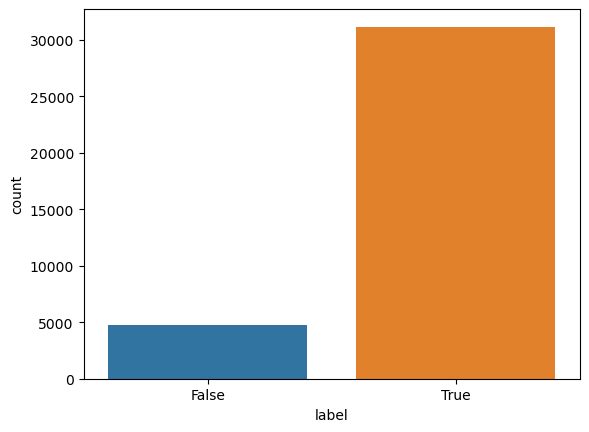

In [148]:
sns.countplot(x=test['label'])

In [149]:
train['label'] = train['label'].replace({True: False, False: True}) #positive class is anomaly
test['label'] = test['label'].replace({True: False, False: True})

<Axes: xlabel='label', ylabel='count'>

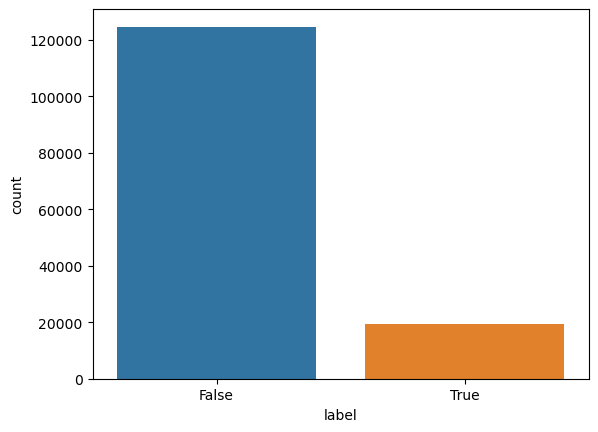

In [150]:
sns.countplot(x=train['label'])
sns.countplot(x=test['label'])

In [151]:
train.dropna(axis = "columns",inplace=True)
train.head()
train.columns

Index(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       ...
       'cluster_246', 'cluster_247', 'cluster_248', 'cluster_249', 'label',
       'row_start', 'row_end', 'time_length', 'timestamp', 'filename'],
      dtype='object', length=256)

In [152]:
test.dropna(axis = "columns",inplace=True)
test.head()
test.columns

Index(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       ...
       'cluster_240', 'cluster_241', 'cluster_242', 'cluster_243', 'label',
       'row_start', 'row_end', 'time_length', 'timestamp', 'filename'],
      dtype='object', length=250)

In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['label'] = le.fit_transform(train['label'])

test['label'] = le.fit_transform(test['label'])

In [154]:
def train_test(train_file, test_file):
        
    X_train= train.drop(columns = ['label','filename'])
    y_train=train.loc[:,'label']
    
    X_test= test.drop(columns = ['label','filename'])
    y_test=test.loc[:,'label']
    return X_train,y_train.values,X_test,y_test.values

In [155]:
x_train,y_train,x_test,y_test = train_test(train,test)

In [156]:
print("columns for the x_test file"+ str(x_test.columns))
print("columns for the x_train file"+ str(x_train.columns))

columns for the x_test fileIndex(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       ...
       'cluster_238', 'cluster_239', 'cluster_240', 'cluster_241',
       'cluster_242', 'cluster_243', 'row_start', 'row_end', 'time_length',
       'timestamp'],
      dtype='object', length=248)
columns for the x_train fileIndex(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
       ...
       'cluster_244', 'cluster_245', 'cluster_246', 'cluster_247',
       'cluster_248', 'cluster_249', 'row_start', 'row_end', 'time_length',
       'timestamp'],
      dtype='object', length=254)


In [157]:
x_train = x_train[x_test.columns]

In [158]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(143835, 248) (143835,) (35884, 248) (35884,)


In [159]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [160]:
pred = lr.predict(x_test)
lr_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test, pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test, pred)}')

lr_report

Test Result:
Accuracy Score: 86.82%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.868186     0.0  0.868186      0.434093      0.753748
recall         1.000000     0.0  0.868186      0.500000      0.868186
f1-score       0.929443     0.0  0.868186      0.464722      0.806930
support    31154.000000  4730.0  0.868186  35884.000000  35884.000000
_______________________________________________
Confusion Matrix: 
 [[31154     0]
 [ 4730     0]]

_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


,0,1,accuracy,macro avg,weighted avg
precision,0.868186,0.0,0.868186,0.434093,0.753748
recall,1.000000,0.0,0.868186,0.500000,0.868186
f1-score,0.929443,0.0,0.868186,0.464722,0.806930
support,31154.000000,4730.0,0.868186,35884.000000,35884.000000


In [161]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)
print(dummy_pred)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('accuracy score: ', accuracy_score(y_test, dummy_pred))

[0 0 0 ... 0 0 0]
Unique predicted labels:  [0]
accuracy score:  0.868186378330175
